In [ ]:
#%pip install seaborn

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [44]:
line = "="*50

In [3]:
%pwd

'c:\\Users\\gbeno\\Documents\\WS_ML_PERSO\\BASIC_CAR_PRICING_WITH_STREAMLIT'

In [7]:
df = pd.read_csv(r"data/Automobile_data.txt")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Objectif : un modèle régression qui prédit le prix des voitures.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

La variable price n'est pas au format float et certaines variables quanti sont classées object (exp normalized-loss)

Nettoyage : 


In [26]:
cols_to_clean = []
for col in df.columns : 
    k = df[col].loc[df[col] == '?'].count()
    if k != 0 :
        # print('to clean :', col)
        cols_to_clean.append(col)
print(cols_to_clean)

['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


In [30]:
def cleaning(df):
    # recenser les variables a traiter 
    cols_to_clean = []
    for col in df.columns : 
        k = df[col].loc[df[col] == '?'].count()
        if k != 0 :
            # print('to clean :', col)
            cols_to_clean.append(col)
    
    # traitement
    # remplacer les ? par la mediane (ne pas affecter la distro)
    # et convertir en int
    for col in cols_to_clean :
        try : 
            v = df[col].loc[df[col] != '?']
            vmedian = v.astype(str).astype(int).median()
            df[col] = df[col].replace('?',vmedian).astype(int)
        except ValueError :
            pass
    
    return df.head()

# execution
cleaning(df)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [31]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,120.600000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,104.165854,5126.097561,25.219512,30.751220,13150.307317
std,1.245307,31.805105,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,39.529733,477.035772,6.542142,6.886443,7879.121326
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


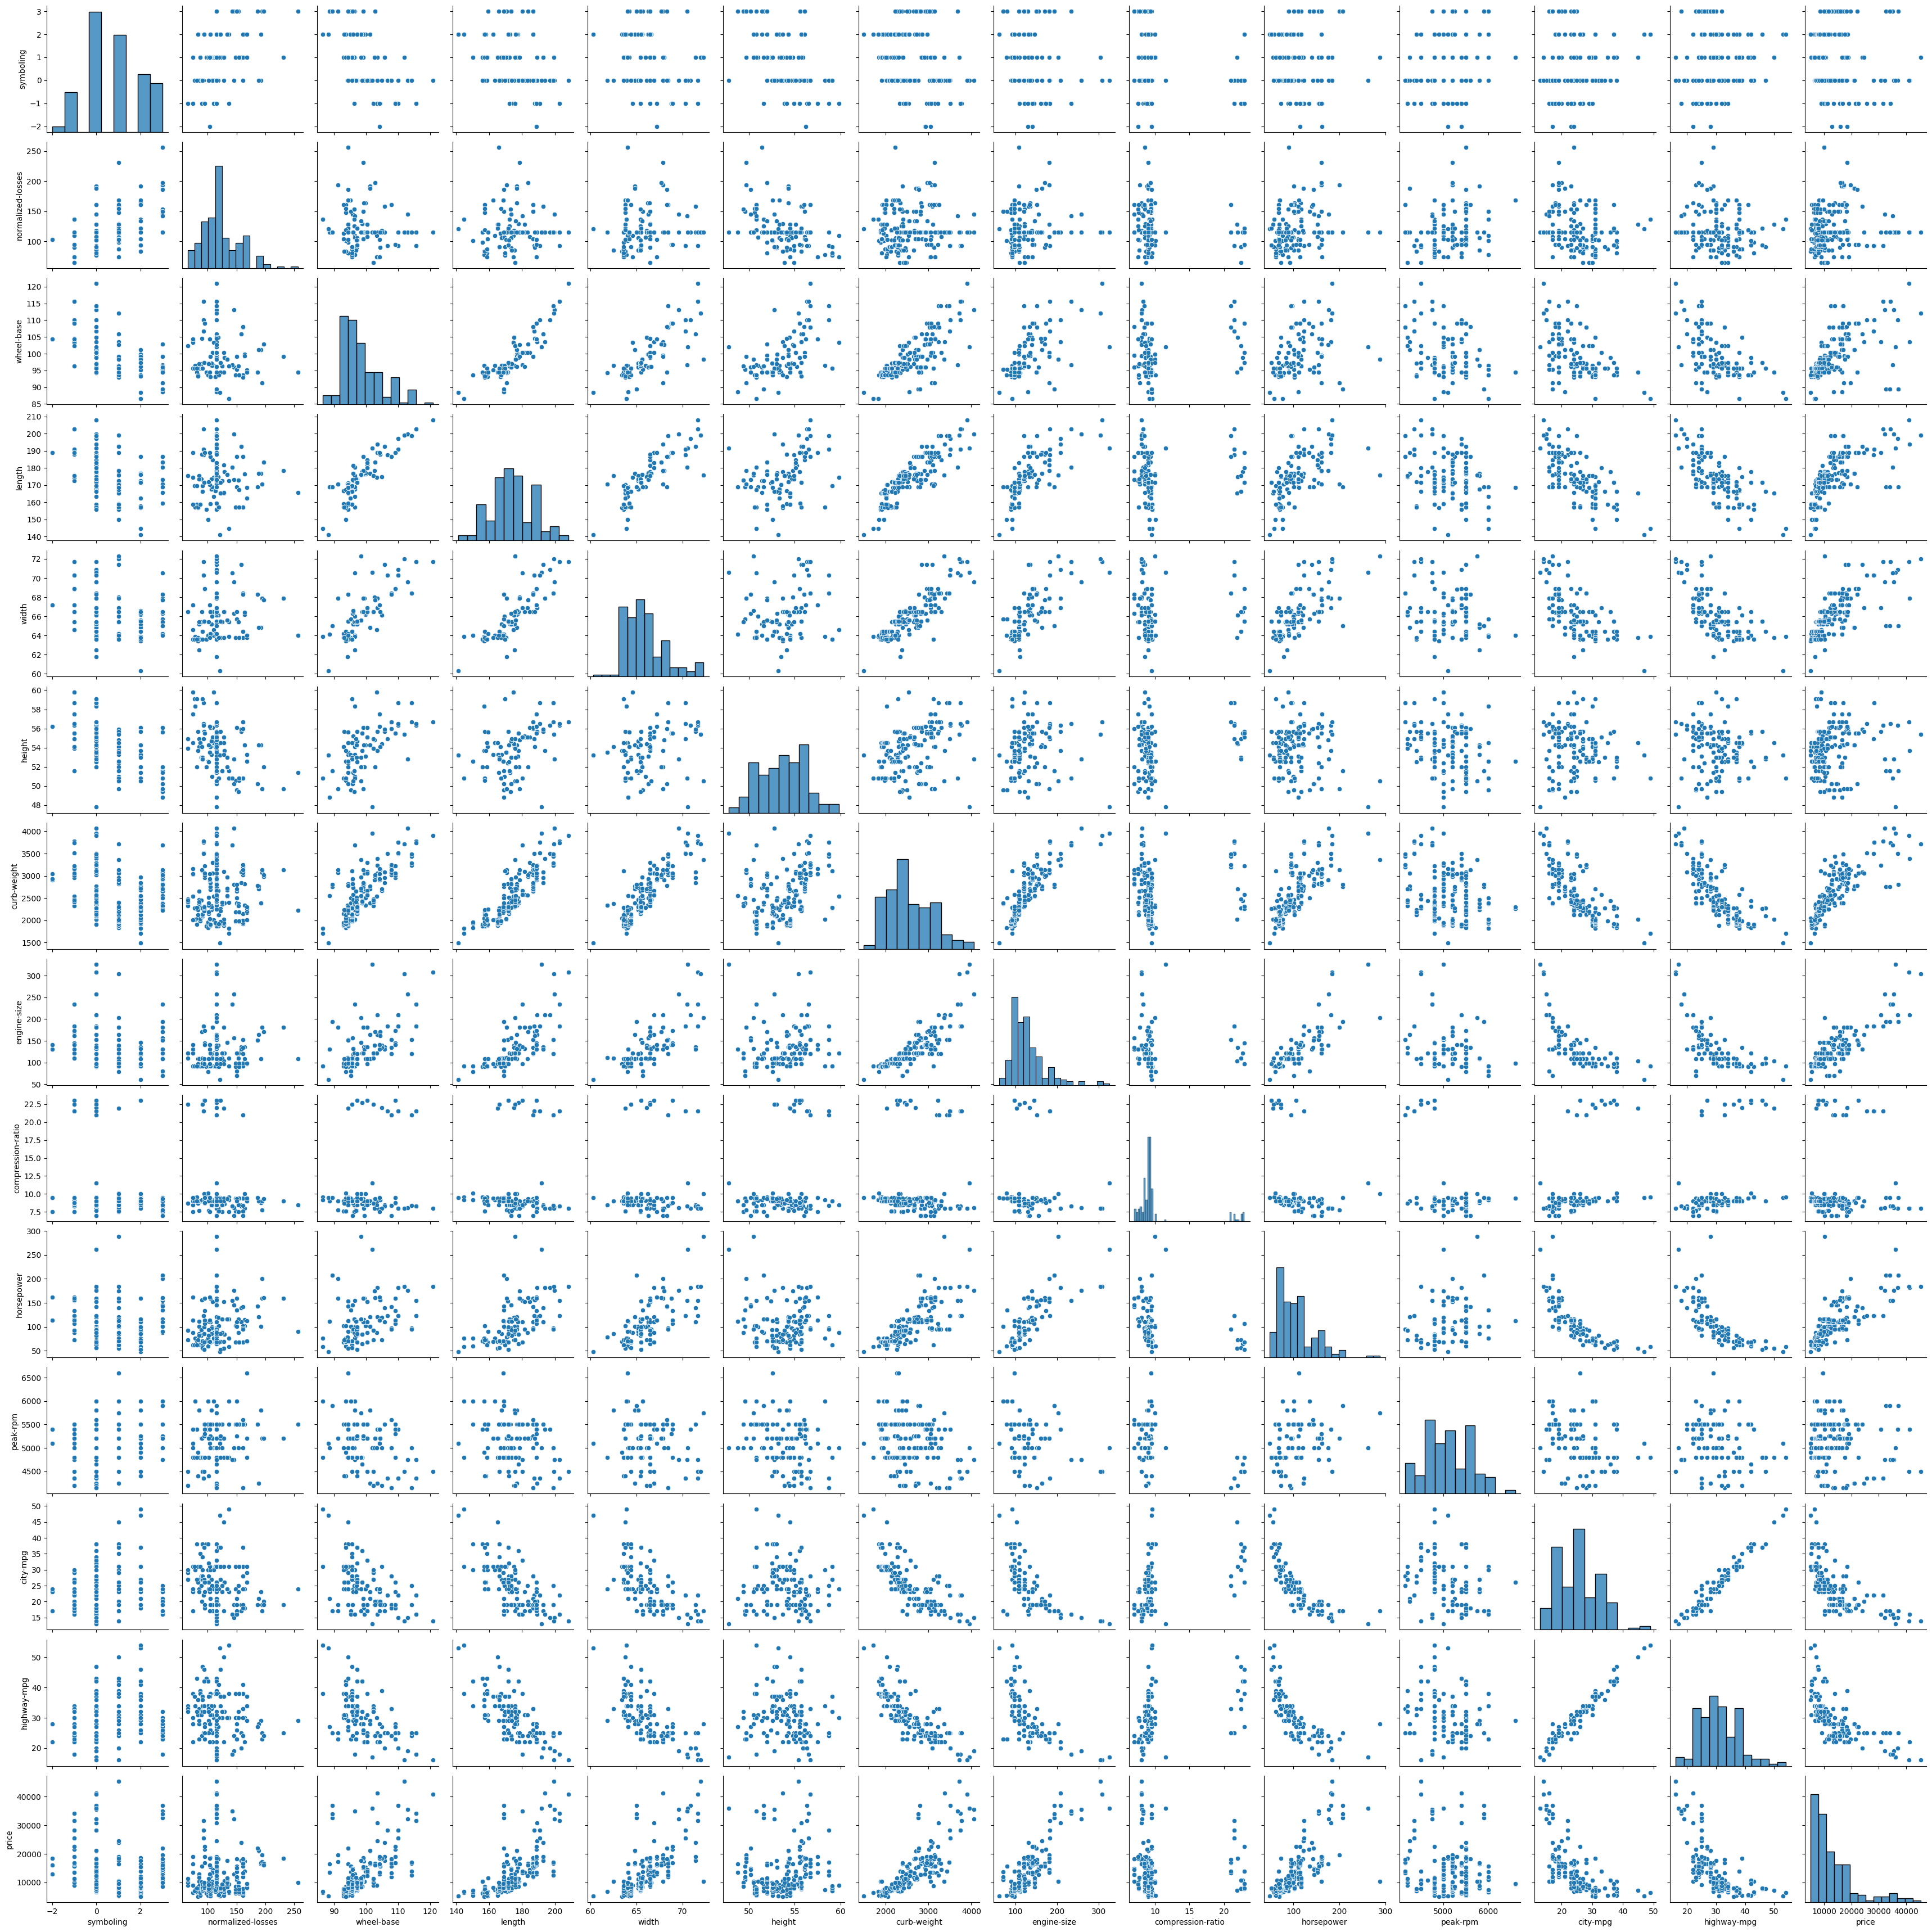

In [32]:
sns.pairplot(df)

In [33]:
df_num = df.select_dtypes(exclude="object")
df_num.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [35]:
# features X
X = df_num.drop("price", axis=1)

# target y
y = df['price']

# train_test_split
seed = 2309
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(164, 13) (41, 13) (164,) (41,)


In [42]:
# Modèle de reg lineaire multiple
lr = make_pipeline(StandardScaler(with_mean=True), LinearRegression(fit_intercept=False))
lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [43]:
# Modèle random forest 
rf = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=seed))
rf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=2309))])

In [53]:
def evaluate_model(model, rep = False):
    train_preds = model.predict(X_train)
    rmse_train = round(mean_squared_error(y_train, train_preds, squared=False), 3)

    test_preds = model.predict(X_test)
    rmse_test = round(mean_squared_error(y_test, test_preds, squared=False), 3)

    if rep :
        return rmse_train, rmse_test
    else : 
        print(line)
        print("Train error :",rmse_train) 
        print("Test error :", rmse_test)
    

In [54]:
# execution
print("Regression lineaire")
evaluate_model(lr)
print("\nRandom forest")
evaluate_model(rf)

Regression lineaire
Train error : 13338.326
Test error : 13858.206

Random forest
Train error : 1099.656
Test error : 2764.427


Random forest regressor plus performant de loin

In [55]:
evaluate_model(rf, rep = True)

(1099.656, 2764.427)

Sauvegarde du modele final à envoyer sur streamlit

In [73]:
import joblib
joblib.dump(rf, "final_model.joblib")

['final_model.joblib']